University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from tueplots import bundles
from tueplots.constants.color import rgb

## Import data

In [30]:
df_dict = {}
folder_path = '../dat/gain-comparison/gain-comp/avg_gain/'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[2].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        #print(key)
        df_dict[key] = df

#print(df_dict['Berlin Hbf'])

In [31]:
cities = list(df_dict.keys())
cities.sort()
cities

['Berlin Hbf',
 'Bremen Hbf',
 'Dortmund Hbf',
 'Dresden Hbf',
 'Duesseldorf Hbf',
 'Duisburg Hbf',
 'Erfurt Hbf',
 'Essen Hbf',
 'Hamburg Hbf',
 'Hannover Hbf',
 'Karlsruhe Hbf',
 'Kiel Hbf',
 'Koeln Hbf',
 'Leipzig Hbf',
 'Magdeburg Hbf',
 'Mainz Hbf',
 'Muenchen Hbf',
 'Nuernberg Hbf',
 'Potsdam Hbf',
 'Saarbruecken Hbf',
 'Schwerin Hbf',
 'Stuttgart Hbf',
 'Wiesbaden Hbf']

In [32]:
df_dict['Hamburg Hbf'].head(2)

,switch time,date,delay,reachable
Mainz Hbf,"[58.0, 1.0, 58.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0...","[2023-10-03 14:18:00, 2023-04-02 22:18:00, 202...","[18, 61, 7, 60.0, 60.0, 13, 0, 0, 0, 1, 60.0, ...","[3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, ..."
Koeln Hbf,"[58.0, 58.0, 43.0, 3.0, 51.0, 51.0, 3.0, 5.0, ...","[2023-10-03 16:05:00, 2023-10-04 16:05:00, 202...","[33, 1, 0, 29.0, 4, 4, 32.0, 1, 6, 6, 0, 3, 13...","[3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, ..."


## Mean Delay for each switch time

In [34]:
switch_times_array = list(range(1,61,1))
empty = pd.DataFrame(columns=['switch_times', 'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
empty.switch_times = switch_times_array
empty['mean_delay'] = [[] for _ in range(60)]
empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0


#for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
#    empty[column] = [np.array([]) for _ in range(60)]
#display(empty.head(2))

# -------------------

delay_matrix = [[] for _ in range(60)]

# data processing
for key, df in df_dict.items():
    
    #display(df.head(2))
    for irow, row in df.iterrows():
        
        #print(row)

        for i, minute in enumerate(row['switch time']):
            
    
            delay = row['delay'][i]
            #print(empty.loc[minute-1, 'mean_delay'])
            #print(type(empty.loc[minute-1, 'mean_delay']))


            #empty.loc[minute-1, 'mean_delay'].append(delay)
            delay_matrix[int(minute-1)].append(delay)

            #print(empty.loc[minute-1, 'mean_delay'])
            

            # Fill the reachable columns
            case = row['reachable'][i]
            if case == 1:
                empty.loc[minute-1, 'reachable1'] += 1
            elif case == 2:
                empty.loc[minute-1, 'reachable2'] += 1
            elif case == 3:
                empty.loc[minute-1, 'reachable3'] += 1
            
            #display(empty)
            #break
   
        #break

means = []
medians = []
for minute in delay_matrix:
    means.append(np.mean(minute).round(2))
    medians.append(np.median(minute).round(2))

#print(means)
empty['mean_delay'] = means
empty['median_delay'] = medians
df_mean_delays = empty

## Mean delay at destination

In [43]:
empty = pd.DataFrame(columns=cities, index=cities)

# Data processing

df_mean = empty.copy()
df_median = empty.copy()

for key, df in df_dict.items():
    #print(key)
    #display(df.head(2))
    df["meanDelay"] =df["delay"].apply(np.mean)
    df["medianDelay"] = df["delay"].apply(np.median)
    array_mean = df["delay"].apply(np.nanmean).round()
    array_median = df["delay"].apply(np.median)
    #print(key)
    #print(key, array_mean)
    df_mean.loc[key] = array_mean
    df_median.loc[key] = array_median
    

    #break

df_mean = df_mean.fillna(np.nan)

c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jb\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\algorithms.py:1814: RuntimeWarning: Mean of empty slice
  return lib.map_infer(values, mapper, convert=convert)


In [ ]:
df_mean

,Berlin Hbf,Erfurt Hbf,Essen Hbf,Hamburg Hbf,Hannover Hbf,Kiel Hbf,Koeln Hbf,Leipzig Hbf,Magdeburg Hbf,Potsdam Hbf,Schwerin Hbf,Stuttgart Hbf
Berlin Hbf,NaN,NaN,36.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,29.0
Erfurt Hbf,NaN,NaN,32.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,26.0
Essen Hbf,27.0,20.0,NaN,NaN,NaN,NaN,NaN,23.0,52.0,2.0,48.0,31.0
Hamburg Hbf,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,31.0
Hannover Hbf,NaN,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,29.0
Kiel Hbf,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,35.0
Koeln Hbf,33.0,30.0,NaN,38.0,31.0,49.0,NaN,39.0,39.0,2.0,43.0,35.0
Leipzig Hbf,NaN,NaN,31.0,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,24.0
Magdeburg Hbf,NaN,NaN,82.0,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,49.0
Potsdam Hbf,NaN,NaN,27.0,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,50.0


In [ ]:
df_mean.drop('Potsdam Hbf', inplace=True)
del df_mean['Potsdam Hbf']

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


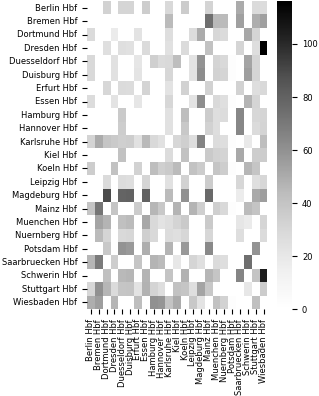

In [36]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))

nan_color = 'lightgrey'


plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
second_highest = data_sorted[1]
min_data = data_sorted[-1]

heatmap = sns.heatmap(df_mean, annot=False, cmap='Greys', mask=df_mean.isna(), cbar=True) # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_greys.pdf", format="pdf")

plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


              Berlin  Bremen  Dortmund  Dresden  Duesseldorf  Duisburg  \
Berlin           NaN     NaN      33.0      NaN         31.0      31.0   
Bremen           NaN     NaN       NaN      NaN          NaN       NaN   
Dortmund        28.0     NaN       NaN     18.0          NaN       NaN   
Dresden          NaN     NaN      25.0      NaN         25.0      24.0   
Duesseldorf     29.0     NaN       NaN     24.0          NaN       NaN   
Duisburg        29.0     NaN       NaN     24.0          NaN       NaN   
Erfurt           NaN     NaN      30.0      NaN         28.0      27.0   
Essen           27.0     NaN       NaN     23.0          NaN       NaN   
Hamburg          NaN     NaN       NaN      NaN         37.0       NaN   
Hannover         NaN     NaN       NaN      NaN         35.0       NaN   
Karlsruhe       32.0    50.0      39.0     37.0         34.0      35.0   
Kiel             NaN     NaN       NaN      NaN         41.0       NaN   
Koeln           35.0     NaN       NaN

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


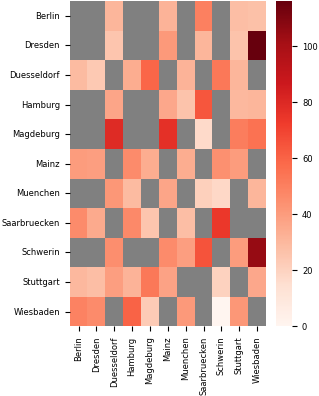

In [53]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))

#nan_color = 'lightgrey'

print(df_mean)
state_capitals = [
    "Berlin Hbf", "Hamburg Hbf", "Muenchen Hbf", "Stuttgart Hbf", 
    "Duesseldorf Hbf", "Mainz Hbf", "Wiesbaden Hbf", "Saarbruecken Hbf", 
    "Schwerin Hbf", "Dresden Hbf", "Magdeburg Hbf", 
]

# Replace ' Hbf' from the state capitals
cleaned_capitals = [city.replace(' Hbf', '') for city in state_capitals]

# Replace ' Hbf' in DataFrame indices and columns
df_mean.index = df_mean.index.str.replace(' Hbf', '')
df_mean.columns = df_mean.columns.str.replace(' Hbf', '')

# Filter the DataFrame to only include the state capitals
df_filtered = df_mean.loc[cleaned_capitals, cleaned_capitals]

# Sort the indices and columns alphabetically
df_done = df_filtered.sort_index().sort_index(axis=1)
print(df_done)
plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
#data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
#second_highest = data_sorted[1]
#min_data = data_sorted[-1]

cmap = sns.color_palette("Reds", as_cmap=True)
cmap.set_bad('gray')  # Set color for NaN values

# Plot the heatmap

heatmap = sns.heatmap(df_done, annot=False, cmap=cmap, cbar=True, 
                      vmin=0, vmax=df_mean.max().max())  # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_reds.pdf", format="pdf")

plt.show()